In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [74]:
def predict(input_data, weights):
    summation = np.dot(input_data, weights)
    return 1 if summation >= 0 else 0

In [75]:
def perceptron_train(inputs, labels, learning_rate=0.1, epochs=10):
    num_inputs = len(inputs[0])
    weights = np.zeros(num_inputs + 1)

    for _ in range(epochs):
        for i, input_data in enumerate(inputs):
            input_with_bias = np.insert(input_data, 0, 1)
            prediction = predict(input_with_bias, weights)
            error = labels[i] - prediction
            weights += learning_rate * error * input_with_bias

    return weights

In [76]:
def test_gate(inputs, labels, weights):
    for i, input_data in enumerate(inputs):
        input_with_bias = np.insert(input_data, 0, 1)
        prediction = predict(input_with_bias, weights)
        print(f"Input: {input_data}, Output(y): {prediction}, Actual(y^): {labels[i]}")


# Or Gate

In [77]:
# OR gate
training_inputs_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_or = np.array([0, 1, 1, 1])
weights_or = perceptron_train(training_inputs_or, labels_or)
print("OR Gate:")
test_gate(training_inputs_or, labels_or, weights_or)



OR Gate:
Input: [0 0], Output(y): 0, Actual(y^): 0
Input: [0 1], Output(y): 1, Actual(y^): 1
Input: [1 0], Output(y): 1, Actual(y^): 1
Input: [1 1], Output(y): 1, Actual(y^): 1


# AND Gate

In [78]:
# AND gate
training_inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_and = np.array([0, 0, 0, 1])
weights_and = perceptron_train(training_inputs_and, labels_and)
print("\nAND Gate:")
test_gate(training_inputs_and, labels_and, weights_and)


AND Gate:
Input: [0 0], Output(y): 0, Actual(y^): 0
Input: [0 1], Output(y): 0, Actual(y^): 0
Input: [1 0], Output(y): 0, Actual(y^): 0
Input: [1 1], Output(y): 1, Actual(y^): 1


# Part 2

# Load Data Set 

In [79]:
df = pd.read_csv("horseRacing - horseRacing.csv")
df

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.070,-1.96,-1.950,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.000,0.00,0.000,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.480,0.44,0.390,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.320,1.09,0.780,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.000,0.00,0.390,1.17,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98385,691981,1770390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11.0
98386,691981,1770391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,81.0
98387,719014,901847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.71,-0.71,0.740,0.71,0.770,0.71,1.0,3.1
98388,719014,904955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.71,0.71,-0.670,-0.71,-0.640,-0.71,2.0,7.0


# Cleaning 

In [80]:

df.fillna(df.mean(), inplace=True)  
# Using Z score to remove outliers 
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]  
# drop duplicates 
df.drop_duplicates(inplace=True)
# Assuming 'price' column cannot be negative
df['price'] = df['price'].apply(lambda x: max(0, x))

C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\2365330442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\2365330442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(lambda x: max(0, x))


In [81]:
df

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.710000,...,-1.160000,0.00000,1.870000,1.870000,-2.070000,-1.960000,-1.950000,-0.300000,8.0,17.0
1,495886,607093,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.050000,...,0.770000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,5.0,26.0
2,495886,637337,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.970000,...,-1.160000,0.00000,0.000000,0.000000,0.480000,0.440000,0.390000,-0.860000,7.0,17.0
3,495886,659819,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.210000,...,0.770000,0.00000,0.000000,0.000000,0.320000,1.090000,0.780000,-0.860000,1.0,4.0
4,495886,661530,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.080000,...,0.770000,0.00000,0.000000,0.000000,0.000000,0.000000,0.390000,1.170000,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98371,691981,1175985,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.000095,...,-0.001547,-0.08194,-0.003415,-0.003084,0.047144,0.058346,0.100101,-0.008975,3.0,26.0
98372,691981,1265823,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.000095,...,-0.001547,-0.08194,-0.003415,-0.003084,0.047144,0.058346,0.100101,-0.008975,9.0,18.0
98387,719014,901847,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.000095,...,-0.001547,-0.08194,-0.710000,-0.710000,0.740000,0.710000,0.770000,0.710000,1.0,3.1
98388,719014,904955,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.000095,...,-0.001547,-0.08194,0.710000,0.710000,-0.670000,-0.710000,-0.640000,-0.710000,2.0,7.0


In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
X = df.drop(columns=['race_id', 'horse_id', 'calc_position', 'price'])  # Exclude specified columns

reserved_columns = ['race_id', 'horse_id', 'calc_position', 'price']
selector = SelectKBest(score_func=f_classif, k=10) 
selector.fit(X, df['calc_position'])
selected_feature_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_feature_indices])
selected_features.extend(reserved_columns)

df = df[selected_features]

print("Selected Features:")
print(selected_features)

print("\nNew DataFrame with Selected Features:")
print(df.head())

Selected Features:
['1-109', '1-114', '1-115', '1-125', '1-126', '1-127', '1-128', '4-114', '4-115', '4-116', 'race_id', 'horse_id', 'calc_position', 'price']

New DataFrame with Selected Features:
   1-109  1-114  1-115  1-125  1-126  1-127  1-128  4-114  4-115  4-116  \
0   0.78  -1.28  -1.12   0.88   0.49   0.00  -0.86  -2.07  -1.96  -1.95   
1   0.78  -0.10  -0.27   1.42   1.36  -0.97  -0.86   0.00   0.00   0.00   
2   1.60  -1.10  -0.98  -0.20   0.05   0.97   0.00   0.48   0.44   0.39   
3  -0.88   0.82   0.22   0.88   0.49   0.00   0.00   0.32   1.09   0.78   
4  -0.05  -0.39  -0.67  -0.20   0.93   0.97   0.00   0.00   0.00   0.39   

   race_id  horse_id  calc_position  price  
0   495886    565129            8.0   17.0  
1   495886    607093            5.0   26.0  
2   495886    637337            7.0   17.0  
3   495886    659819            1.0    4.0  
4   495886    661530            4.0    7.0  


# Binary Encodeing 

In [83]:
threshold = 3
df['binary_label'] = (df['calc_position'] <= threshold).astype(int)

# Display the updated dataframe with the new binary label column
print(df['binary_label'] )

0        0
1        0
2        0
3        1
4        0
        ..
98371    1
98372    0
98387    1
98388    1
98389    1
Name: binary_label, Length: 68919, dtype: int32


C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\2483304434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary_label'] = (df['calc_position'] <= threshold).astype(int)


# ETA

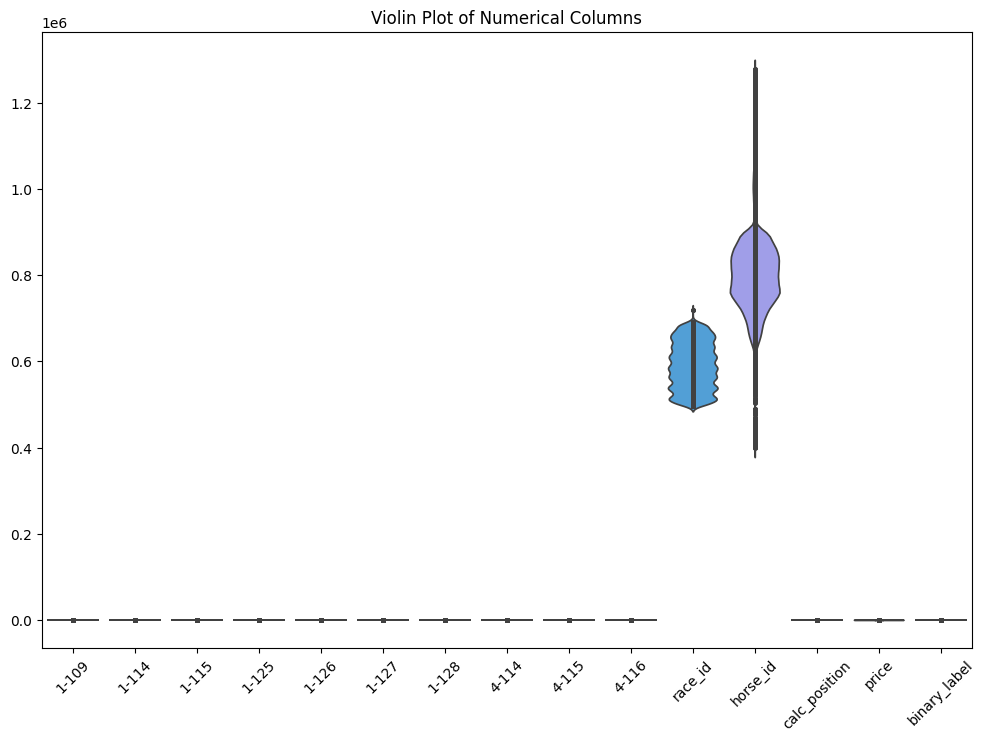

In [84]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, inner="points")
plt.title('Violin Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

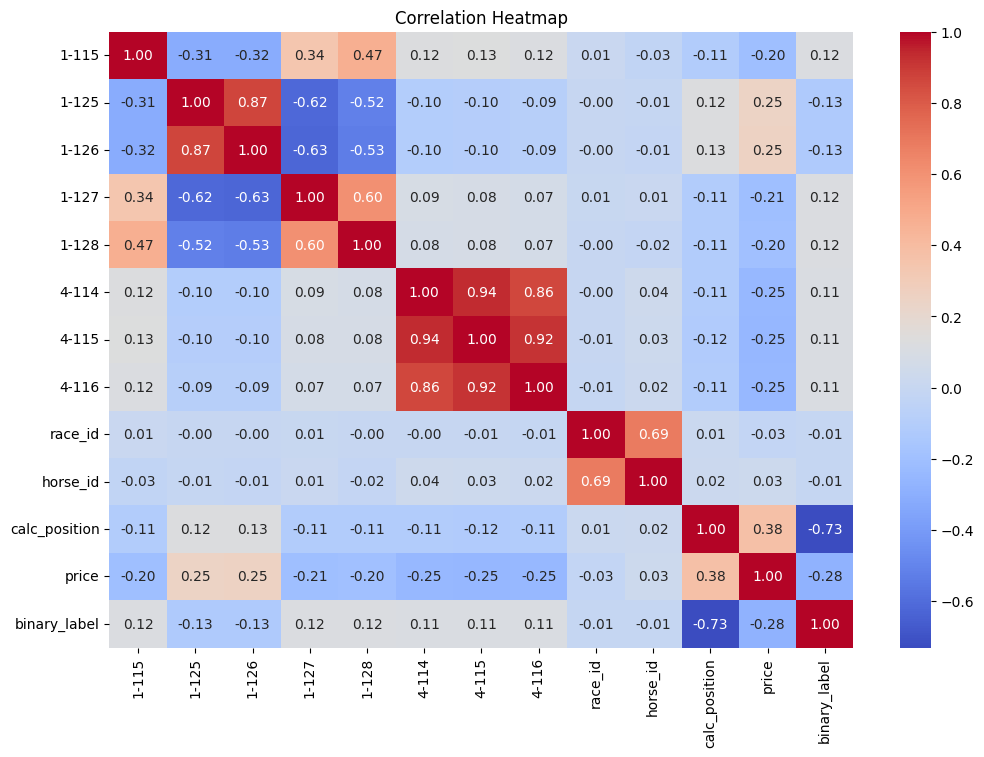

<Figure size 1200x800 with 0 Axes>

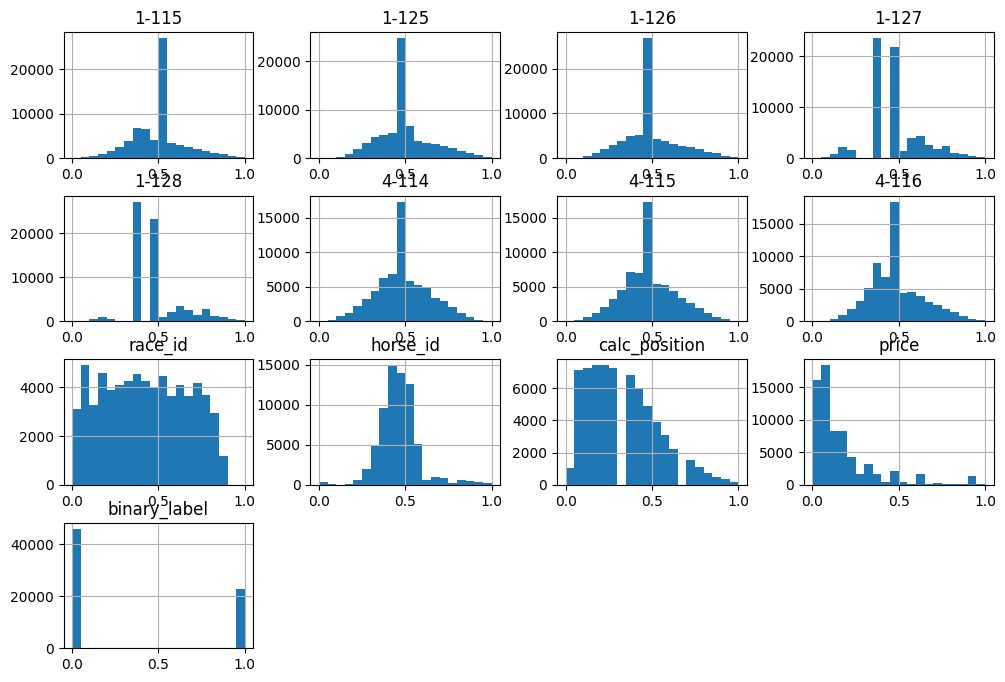

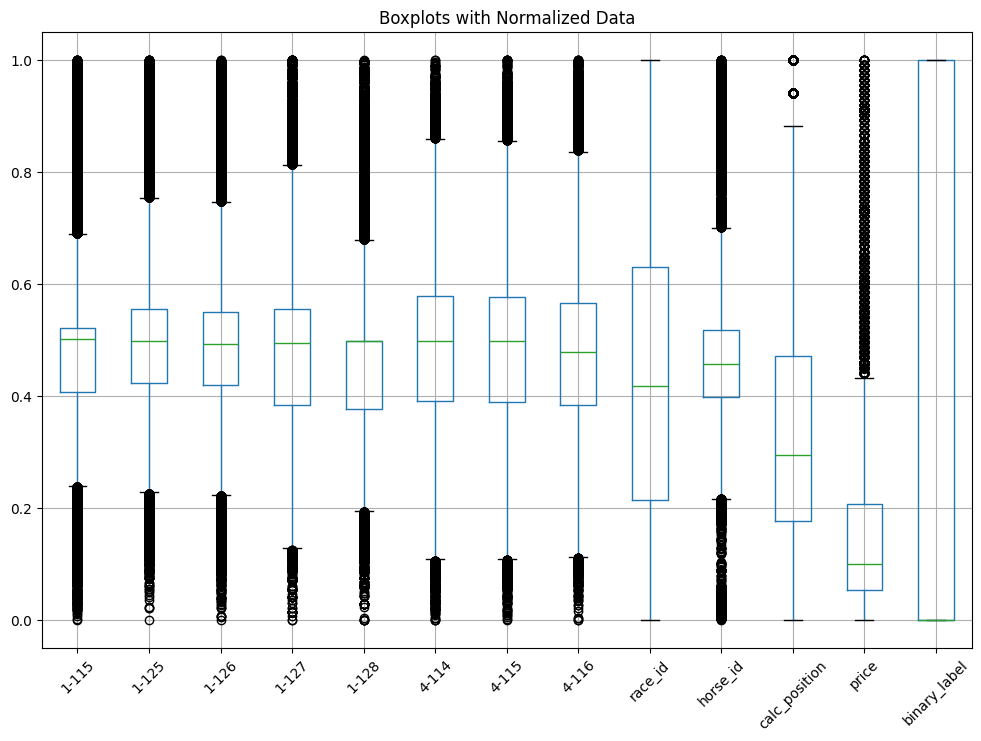

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_numeric = df.iloc[:, 2:]

# Normalize the data
normalized_data = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Plot normalized histograms
plt.figure(figsize=(12, 8))
normalized_data.hist(bins=20, figsize=(12, 8))
plt.title('Normalized Histograms')
plt.show()

# Plot boxplots with normalized data
plt.figure(figsize=(12, 8))
normalized_data.boxplot(rot=45)
plt.title('Boxplots with Normalized Data')
plt.show()




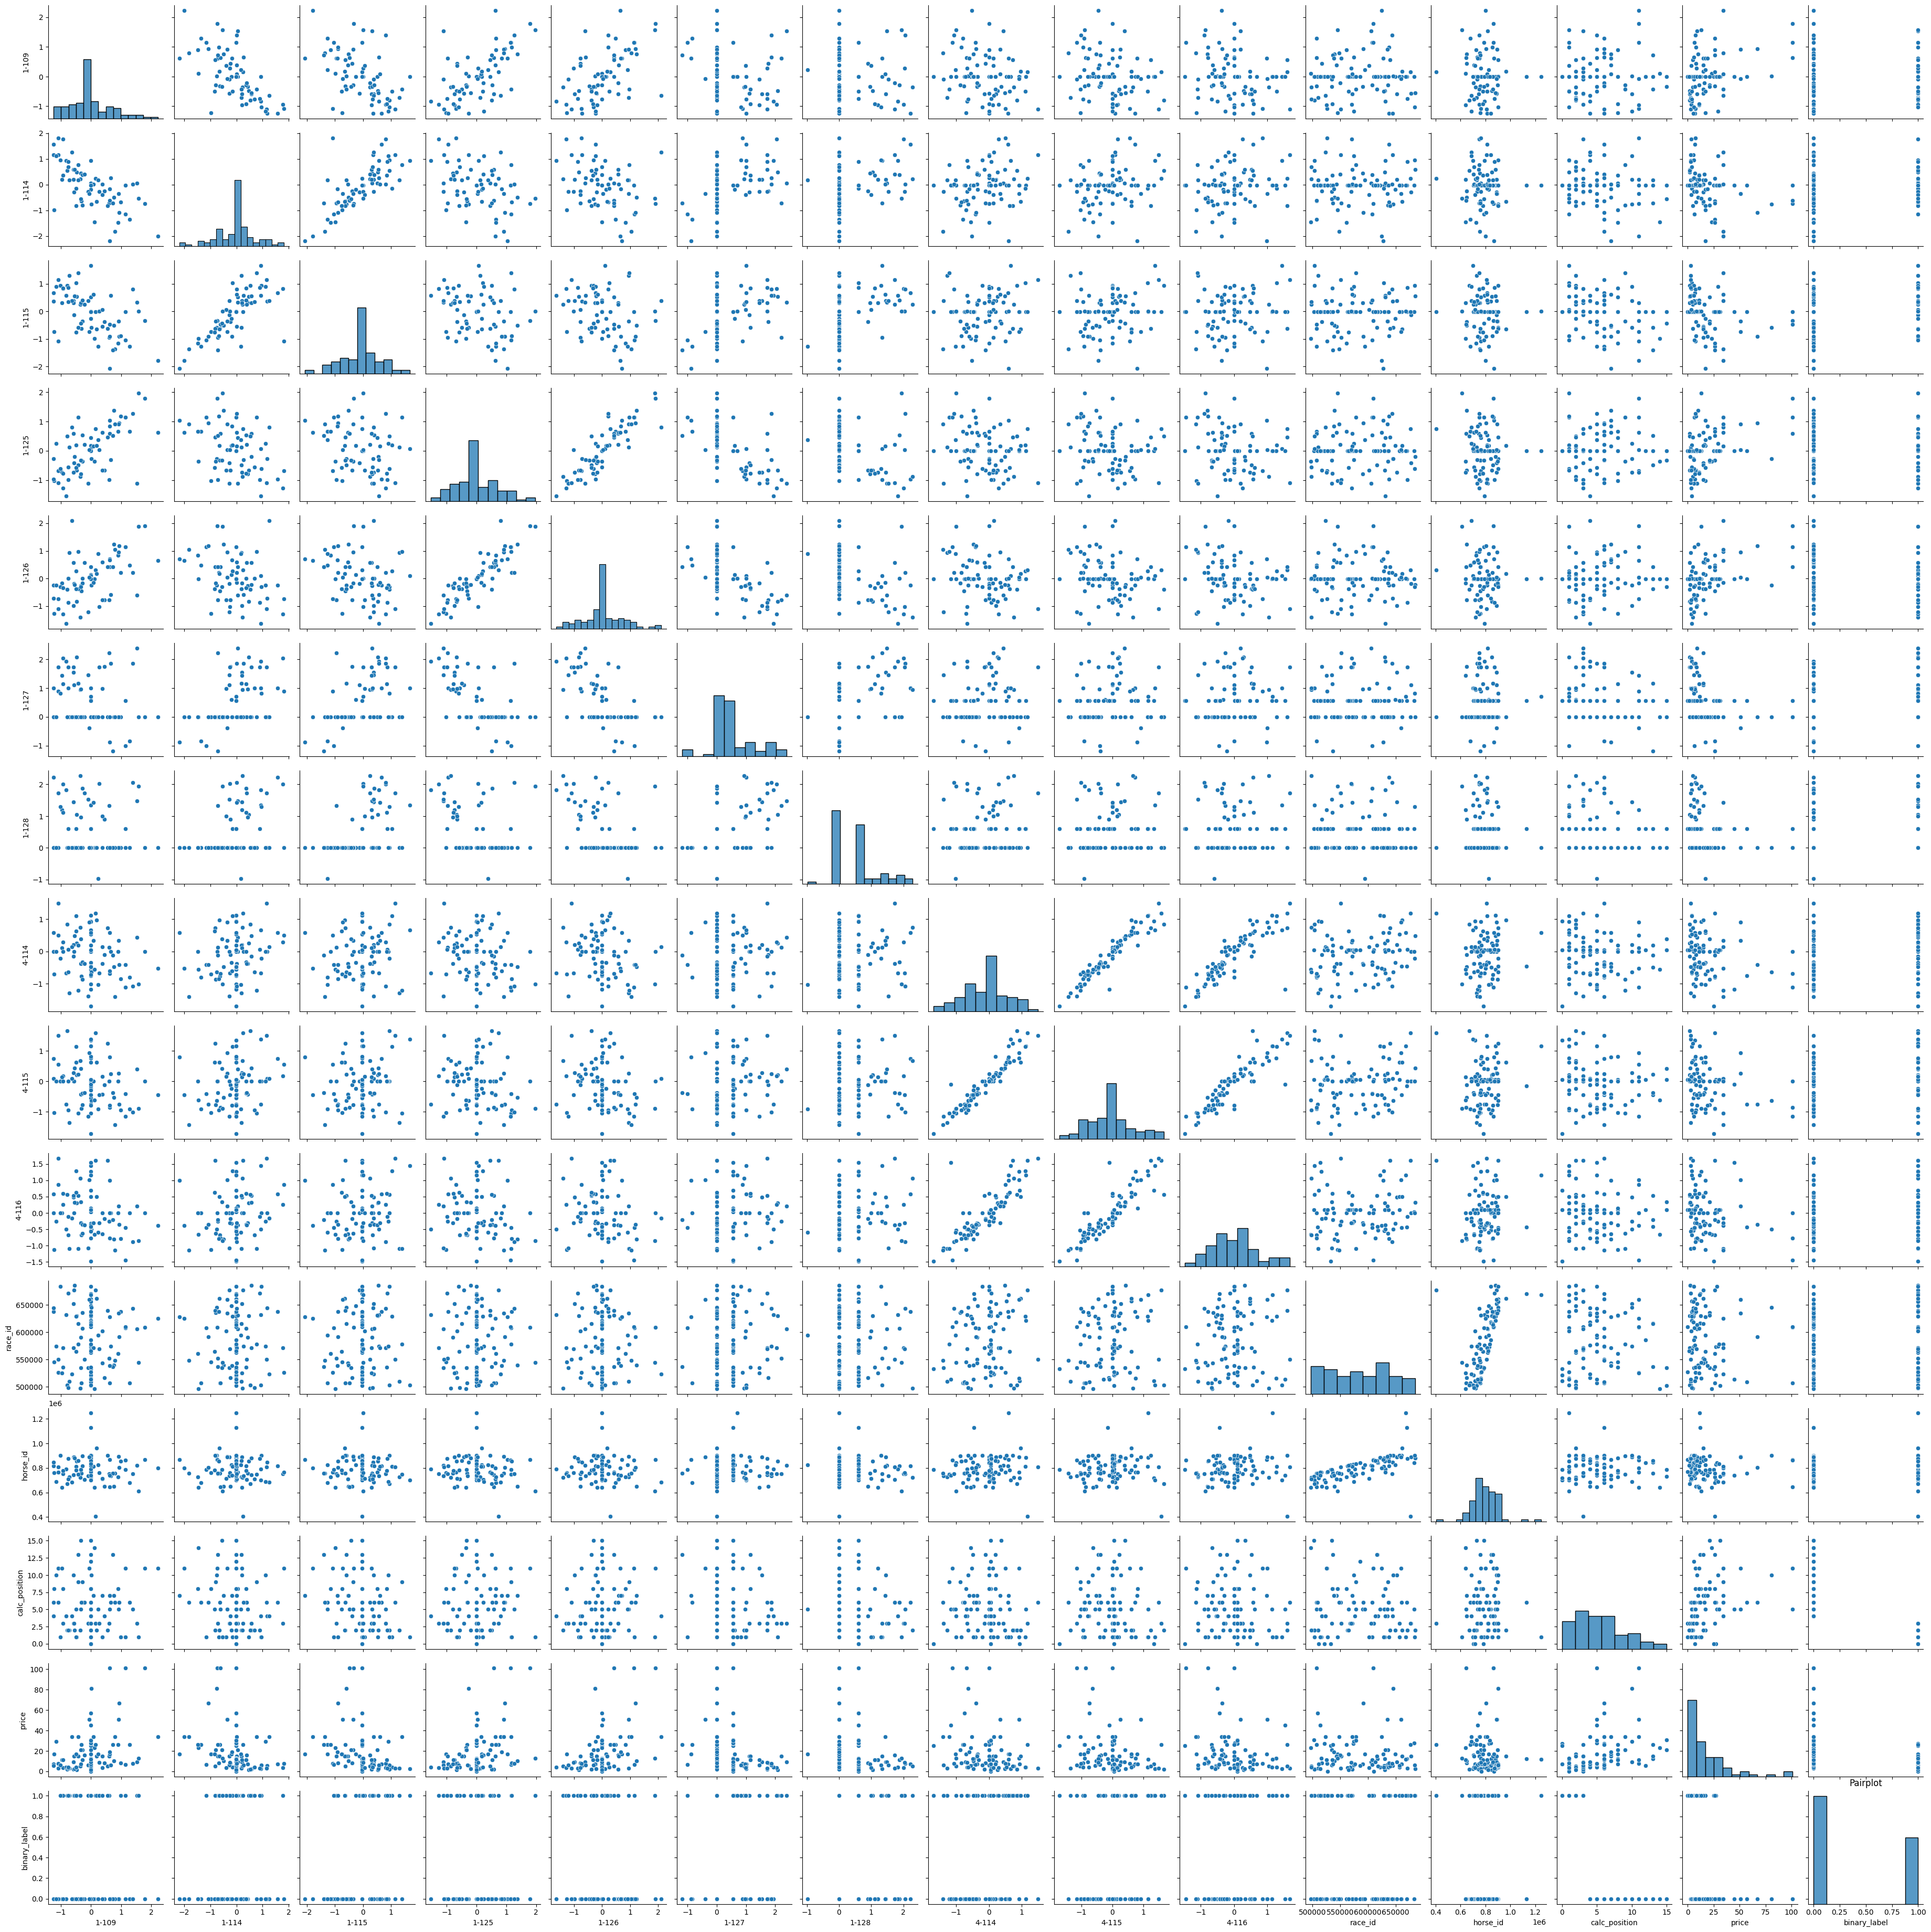

In [86]:

sns.pairplot(df.sample(100))  # Sample the data if it's too large
plt.title('Pairplot')
plt.show()


# What is wrong with dataset, how to solve it?

In [87]:
print("**Issues with the Dataset and Solutions:**\n")
print("1. Negative Values: Negative values can be handled by applying appropriate transformations or shifting techniques to make them non-negative.")
print("2. Outliers: Outliers can be managed by either removing them from the dataset or applying robust statistical techniques that are less affected by extreme values.")
print("3. Skewed Data: Skewed data can be normalized using methods like log transformation or robust algorithms to reduce the impact of extreme values and improve the distribution.")



**Issues with the Dataset and Solutions:**

1. Negative Values: Negative values can be handled by applying appropriate transformations or shifting techniques to make them non-negative.
2. Outliers: Outliers can be managed by either removing them from the dataset or applying robust statistical techniques that are less affected by extreme values.
3. Skewed Data: Skewed data can be normalized using methods like log transformation or robust algorithms to reduce the impact of extreme values and improve the distribution.


# One Hot Encoding 

In [88]:
# Define a dictionary to map each unique category to a binary digit
horse_id_mapping = {id_: i for i, id_ in enumerate(df['horse_id'].unique())}

# Replace the horse_id values with their corresponding binary representation
df['horse_id_encoded'] = df['horse_id'].map(horse_id_mapping)

# Display the resulting DataFrame
print(df[['horse_id', 'horse_id_encoded']].head())


   horse_id  horse_id_encoded
0    565129                 0
1    607093                 1
2    637337                 2
3    659819                 3
4    661530                 4


C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\645968101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horse_id_encoded'] = df['horse_id'].map(horse_id_mapping)


In [89]:
# Define a dictionary to map each unique category to a binary digit
race_id_mapping = {id_: i for i, id_ in enumerate(df['race_id'].unique())}

# Replace the race_id values with their corresponding binary representation
df['race_id_'] = df['race_id'].map(race_id_mapping)



C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\535794006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race_id_'] = df['race_id'].map(race_id_mapping)


In [90]:
df

,1-109,1-114,1-115,1-125,1-126,1-127,1-128,4-114,4-115,4-116,race_id,horse_id,calc_position,price,binary_label,horse_id_encoded,race_id_
0,0.780000,-1.280000,-1.120000,0.880000,0.490000,0.000000,-0.86000,-2.070000,-1.960000,-1.950000,495886,565129,8.0,17.0,0,0,0
1,0.780000,-0.100000,-0.270000,1.420000,1.360000,-0.970000,-0.86000,0.000000,0.000000,0.000000,495886,607093,5.0,26.0,0,1,0
2,1.600000,-1.100000,-0.980000,-0.200000,0.050000,0.970000,0.00000,0.480000,0.440000,0.390000,495886,637337,7.0,17.0,0,2,0
3,-0.880000,0.820000,0.220000,0.880000,0.490000,0.000000,0.00000,0.320000,1.090000,0.780000,495886,659819,1.0,4.0,1,3,0
4,-0.050000,-0.390000,-0.670000,-0.200000,0.930000,0.970000,0.00000,0.000000,0.000000,0.390000,495886,661530,4.0,7.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98371,-0.007666,-0.018749,-0.020775,-0.007807,-0.007449,0.562745,0.60082,0.047144,0.058346,0.100101,691981,1175985,3.0,26.0,1,44842,9728
98372,-0.007666,-0.018749,-0.020775,-0.007807,-0.007449,0.562745,0.60082,0.047144,0.058346,0.100101,691981,1265823,9.0,18.0,0,44843,9728
98387,-0.007666,-0.018749,-0.020775,-0.007807,-0.007449,0.562745,0.60082,0.740000,0.710000,0.770000,719014,901847,1.0,3.1,1,44844,9729
98388,-0.007666,-0.018749,-0.020775,-0.007807,-0.007449,0.562745,0.60082,-0.670000,-0.710000,-0.640000,719014,904955,2.0,7.0,1,44845,9729


# Bonus: Use MLP to tarin a classifier

In [91]:
df.drop(columns=['horse_id', 'race_id'], inplace=True)

# Extract features (X) and target variable (y)
X = df.drop(columns=['calc_position'])  # Features (excluding 'calc_position')
y = df['calc_position']  # Target variable

# Display the first few rows of X and y
print("Features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Features (X):
   1-109  1-114  1-115  1-125  1-126  1-127  1-128  4-114  4-115  4-116  \
0   0.78  -1.28  -1.12   0.88   0.49   0.00  -0.86  -2.07  -1.96  -1.95   
1   0.78  -0.10  -0.27   1.42   1.36  -0.97  -0.86   0.00   0.00   0.00   
2   1.60  -1.10  -0.98  -0.20   0.05   0.97   0.00   0.48   0.44   0.39   
3  -0.88   0.82   0.22   0.88   0.49   0.00   0.00   0.32   1.09   0.78   
4  -0.05  -0.39  -0.67  -0.20   0.93   0.97   0.00   0.00   0.00   0.39   

   price  binary_label  horse_id_encoded  race_id_  
0   17.0             0                 0         0  
1   26.0             0                 1         0  
2   17.0             0                 2         0  
3    4.0             1                 3         0  
4    7.0             0                 4         0  

Target variable (y):
0    8.0
1    5.0
2    7.0
3    1.0
4    4.0
Name: calc_position, dtype: float64


C:\Users\mahma\AppData\Local\Temp\ipykernel_18428\4247137377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['horse_id', 'race_id'], inplace=True)


In [92]:
X = df.drop(columns=['calc_position'])
y = df['calc_position']  
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
accuracy = mlp.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.23614335461404526


c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
